In [1]:
# Script: Calculate_Traders_Dilemma.ipynb

In [1]:
# Step 1. Import Pyton Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [2]:
# Step 2. Input Variables

# Risk Aversion
Lambda = 0.50

# Order Characteristics
Size = 0.10
Volatility = 0.35

# MI Parameters
a1 = 882.900282
a2 = 0.353976
a3 = 0.755553
a4 = 0.824951
b1 = 0.963963

In [3]:
# Step 3. Trade Cost Functions

# Market Impact
def MI_calc(a1, a2, a3, a4, b1, Size, Volatility, POV):
    mi = (a1*Size**a2*Volatility**a3) * (b1*POV**a4 + (1-b1))
    return mi

# Timing Risk
def TR_calc(Size, Volatility, POV):
    tr = Volatility * ((1/3*1/250*Size*(1-POV)/POV )**0.5) * 10**4
    return tr

# Price Appreciation
def PA_calc(Side, AlphaBp, Size, POV):
    pa = Side * (1/2) * AlphaBp * Size * ((1 - POV)/POV)
    return pa

# Trade Time
def TradeTime_calc(Size, POV):
    tt = Size * ((1-POV)/POV)
    return tt


In [4]:
# Step 4. Traders Dilemma Graph - x-axis = trade time
LB = 0.05
UB = 2
time_values =[]

while LB<=UB:
    time_values.append(LB)
    LB = LB + 0.05
#time_values


In [6]:
# Step 5. Traders Dilemma Graph - Cost Calculations
SS_df = pd.DataFrame(time_values, columns = ['time'])   
SS_df['POV'] = Size/(Size + SS_df['time'])
#SS_df['MI'] = SS_df.apply(lambda x: MI_calc(a1, a2, a3, a4, b1, x['POV'], lambda_, Size, Volatility),axis=1)
SS_df['MI'] = SS_df.apply(lambda x: MI_calc( a1, a2, a3, a4, b1, Size, Volatility, x['POV']), axis=1)
SS_df['TR'] = SS_df.apply(lambda x: TR_calc(Size, Volatility ,x['POV']) ,axis=1)
SS_df['adjTR'] = SS_df['TR'] * Lambda
SS_df['Loss'] = SS_df['MI'] + Lambda * SS_df['TR']
#SS_df

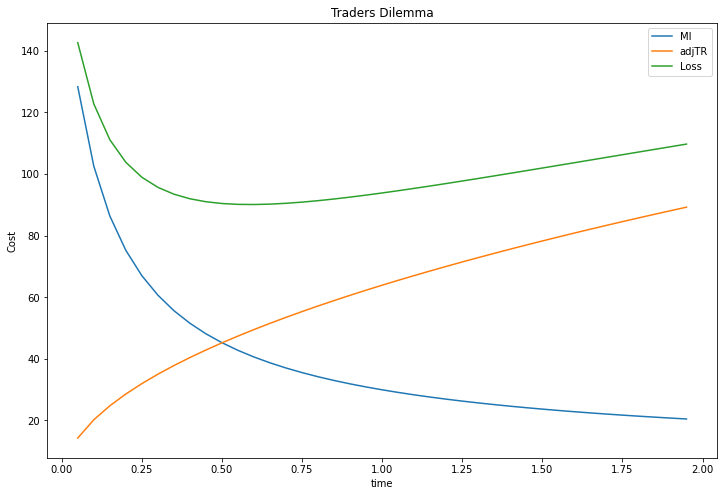

In [7]:
# Step 6. Traders Dilemma Graph
plt.figure(figsize=(12,8))
plt.plot(SS_df['time'], SS_df['MI'], label ='MI')
plt.plot(SS_df['time'], SS_df['adjTR'], label ='adjTR')
plt.plot(SS_df['time'], SS_df['Loss'], label ='Loss')
plt.xlabel("time")
plt.ylabel("Cost")
plt.legend()
plt.title('Traders Dilemma')
plt.show()